# Unsupervised Machine Learning - KMeans

Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection. SVMs are one of the most robust prediction methods. 

Sources: 
[sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html?highlight=kmeans#sklearn.cluster.KMeans), [wikipedia](https://en.wikipedia.org/wiki/K-means_clustering)

![kmeans.png](https://www.mathworks.com/matlabcentral/mlc-downloads/downloads/submissions/52579/versions/9/screenshot.jpg)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets


In [3]:
# Take make moons in built dataset

data_s = datasets.make_moons(100)

In [4]:
# check the dataset

data_s

(array([[ 1.00000000e+00,  0.00000000e+00],
        [ 9.91790014e-01,  1.27877162e-01],
        [-3.20515776e-02,  9.99486216e-01],
        [ 1.84408430e-02,  3.08841371e-01],
        [ 9.67948422e-01, -4.99486216e-01],
        [ 1.71834935e+00, -1.95682551e-01],
        [ 7.30832427e-02,  1.24732995e-01],
        [ 2.38554042e-01, -1.48228395e-01],
        [ 9.97945393e-01,  6.40702200e-02],
        [-9.26916757e-01,  3.75267005e-01],
        [ 1.76144596e+00, -1.48228395e-01],
        [ 1.61911895e-01, -4.55349012e-02],
        [ 1.99794539e+00,  4.35929780e-01],
        [ 5.72116660e-01,  8.20172255e-01],
        [ 3.20515776e-02,  9.99486216e-01],
        [-3.45365054e-01,  9.38468422e-01],
        [ 7.18349350e-01,  6.95682551e-01],
        [ 1.67230089e+00, -2.40277997e-01],
        [-7.18349350e-01,  6.95682551e-01],
        [-5.72116660e-01,  8.20172255e-01],
        [ 1.46253829e+00, -3.86599306e-01],
        [-2.84527587e-01,  9.58667853e-01],
        [ 1.34536505e+00, -4.384

In [5]:
# create input dataframe

inputData = pd.DataFrame(data=data_s[0])

In [7]:
inputData.head()

,0,1
0,1.000000,0.000000
1,0.991790,0.127877
2,-0.032052,0.999486
3,0.018441,0.308841
4,0.967948,-0.499486


In [8]:
# create output dataframe

outputData = pd.DataFrame(data=data_s[1])
outputData.head()

,0
0,0
1,0
2,0
3,1
4,1


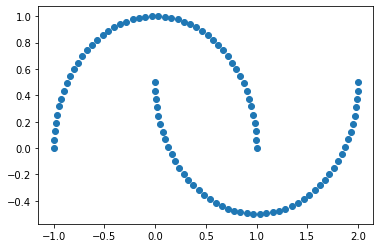

In [10]:
# create a scatter plot for inputData set
plt.scatter(inputData[0], inputData[1])



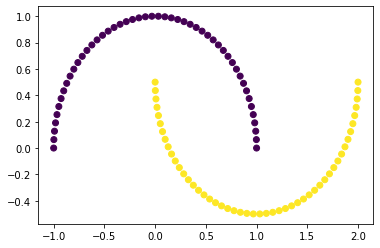

In [11]:
# create a scatter plot for inputData set with outputData color
plt.scatter(inputData[0],inputData[1], c=outputData)


In [44]:
# Call the sklearn Kmeans and make a model with 200 samples
from sklearn.cluster import KMeans
model=KMeans(n_clusters=8)
model.fit(inputData)

#model_fit


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [45]:
# check for labels

model.labels_

array([6, 6, 7, 0, 4, 1, 0, 0, 6, 2, 1, 0, 5, 3, 7, 7, 3, 1, 2, 7, 1, 7,
       1, 1, 5, 6, 3, 2, 5, 6, 0, 4, 0, 5, 5, 2, 7, 2, 4, 3, 0, 6, 2, 3,
       0, 7, 7, 1, 7, 7, 4, 0, 2, 3, 5, 2, 1, 3, 5, 6, 2, 7, 2, 5, 4, 4,
       4, 4, 0, 5, 7, 7, 0, 3, 4, 5, 2, 0, 6, 4, 1, 4, 1, 1, 4, 5, 6, 3,
       1, 3, 2, 2, 2, 6, 6, 1, 3, 0, 4, 3], dtype=int32)

In [38]:
from sklearn import metrics

In [46]:
# call metrics and check silhoutte score

metrics.silhouette_score(inputData,model.labels_)

0.5141589492098584

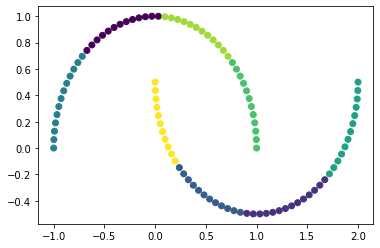

In [40]:
# create a scatter plot for inputData set with model labels color
plt.scatter(inputData[0],inputData[1], c=model.labels_)


#### finding right number of cluster

In [41]:
cluster_range = range(1, 20)
error_list = []

for i in cluster_range:
    model = KMeans(n_clusters=i)
    model.fit(inputData)
    res = model.inertia_
    error_list.append(res)

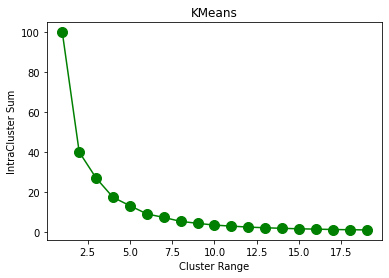

In [42]:
import matplotlib.pyplot as plt

plt.plot(cluster_range, error_list, marker = "o", color = "g", markersize = 10)
plt.xlabel("Cluster Range")
plt.ylabel("IntraCluster Sum")
plt.title("KMeans")
plt.show()